In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
#declare each array as a variable
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

mogadishu so
busselton au
amderma ru
plyussa ru
taolanaro mg
impfondo cg
gorele tr
almunecar es
georgetown sh
pangnirtung ca
coquimbo cl
balykshi kz
catumbela ao
upernavik gl
penha br
hellin es
gambela et
taolanaro mg
gayeri bf
yenagoa ng
geilo no
lebu cl
ventspils lv
east london za
hermanus za
siniscola it
ushuaia ar
svitavy cz
port elizabeth za
usinsk ru
hithadhoo mv
marzuq ly
rio grande br
oranjestad aw
sakakah sa
umm lajj sa
klaksvik fo
high rock bs
ushuaia ar
kodarma in
busselton au
illoqqortoormiut gl
rocha uy
saint-philippe re
victoria sc
hithadhoo mv
ushuaia ar
stolin by
kruisfontein za
ciras af
ilulissat gl
bathsheba bb
abu dhabi ae
attawapiskat ca
salta ar
kimberley za
viligili mv
jamestown sh
coxim br
busselton au
port elizabeth za
aswan eg
luderitz na
mar del plata ar
clonakilty ie
iquique cl
hermanus za
coihaique cl
aktau kz
ushuaia ar
peru us
belushya guba ru
soyo ao
tall kayf iq
kambove cd
orocue co
barsovo ru
carnarvon au
taolanaro mg
nanortalik gl
durban za
antofagasta

barentsburg sj
olinda br
camopi gf
boende cd
cidreira br
upernavik gl
taolanaro mg
clyde river ca
rocha uy
souillac mu
ushuaia ar
bredasdorp za
dombas no
paamiut gl
talas kg
hermanus za
nguruka tz
raga sd
cape town za
jamestown sh
port alfred za
port elizabeth za
kyzyl-suu kg
iqaluit ca
ushuaia ar
paita pe
tasiilaq gl
schwerin de
itaituba br
illoqqortoormiut gl
kunashak ru
bambous virieux mu
amderma ru
manbij sy
sao joao da barra br
ostrovnoy ru
souillac mu
tasiilaq gl
castro cl
belushya guba ru
chaman pk
edd er
bentiu sd
ushuaia ar
ushuaia ar
rudkobing dk
punta arenas cl
hornepayne ca
east london za
santa cruz cr
san andres co
ushuaia ar
arraial do cabo br
ushuaia ar
elizabeth city us
belushya guba ru
muros es
mahebourg mu
orocue co
ushuaia ar
port alfred za
upernavik gl
caravelas br
cape town za
karasjok no
ponta do sol cv
cidreira br
vila franca do campo pt
zwedru lr
illoqqortoormiut gl
upernavik gl
hithadhoo mv
hermanus za
ribeira grande pt
dzhusaly kz
taolanaro mg
busselton au
omb

arraial do cabo br
ushuaia ar
ndende ga
bahia honda cu
cape town za
cape town za
grand river south east mu
aqtobe kz
upernavik gl
zambezi zm
clara ie
busselton au
presidencia roque saenz pena ar
chuy uy
saint-francois gp
matay eg
jamestown sh
bambous virieux mu
bredasdorp za
conceicao do araguaia br
gravdal no
ribeira grande pt
sao geraldo do araguaia br
monte alegre br
ushuaia ar
ushuaia ar
mahebourg mu
santa vitoria do palmar br
bredasdorp za
kavaratti in
pisco pe
hermanus za
bredasdorp za
mayor pablo lagerenza py
saint george bm
mahebourg mu
punta arenas cl
ushuaia ar
attawapiskat ca
the valley ai
cidreira br
ushuaia ar
port alfred za
henties bay na
tsihombe mg
ushuaia ar
harper lr
geraldton au
punta arenas cl
tambura sd
cape town za
mahebourg mu
talagang pk
olafsvik is
forio it
hermanus za
kachikau bw
jamame so
ushuaia ar
barentsburg sj
kaka tm
chiredzi zw
cape town za
ushuaia ar
ushuaia ar
celina us
tsihombe mg
hermanus za
nanortalik gl
axim gh
salamanca cl
canico pt
goderich sl
k

In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

        # Print the city count to confirm sufficient count.
        len(cities)


In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
#print(city_url)

weather_response = requests.get(city_url)
weather_json = weather_response.json()

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
# In the code block, we have initialized the counters at 1 because we want the first iteration of the logging
# for each recorded response and the set to start at 1.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
    
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(), "Cloudiness": city_clouds, "Country": city_country, "Date": city_date, "Humidity": city_humidity, "Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp, "Wind Speed": city_wind,})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mogadishu
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | amderma
City not found. Skipping...
Processing Record 4 of Set 1 | plyussa
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | impfondo
Processing Record 7 of Set 1 | gorele
Processing Record 8 of Set 1 | almunecar
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | pangnirtung
Processing Record 11 of Set 1 | coquimbo
Processing Record 12 of Set 1 | balykshi
Processing Record 13 of Set 1 | catumbela
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | penha
Processing Record 16 of Set 1 | hellin
Processing Record 17 of Set 1 | gambela
Processing Record 18 of Set 1 | gayeri
Processing Record 19 of Set 1 | yenagoa
Processing Record 20 of Set 1 | geilo
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | ventspils

Processing Record 34 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 35 of Set 4 | salaya
Processing Record 36 of Set 4 | colesberg
Processing Record 37 of Set 4 | ribeira grande
Processing Record 38 of Set 4 | qaanaaq
Processing Record 39 of Set 4 | puerto carreno
Processing Record 40 of Set 4 | nguruka
Processing Record 41 of Set 4 | pontes e lacerda
Processing Record 42 of Set 4 | luanda
Processing Record 43 of Set 4 | sao joao do piaui
Processing Record 44 of Set 4 | mao
Processing Record 45 of Set 4 | karakendzha
City not found. Skipping...
Processing Record 46 of Set 4 | sal rei
Processing Record 47 of Set 4 | ancud
Processing Record 48 of Set 4 | touros
Processing Record 49 of Set 4 | kyrylivka
Processing Record 50 of Set 4 | the valley
Processing Record 1 of Set 5 | ciudad bolivar
Processing Record 2 of Set 5 | aden
Processing Record 3 of Set 5 | rebrikha
Processing Record 4 of Set 5 | gorom-gorom
Processing Record 5 of Set 5 | varnavino
Processing Record 6 of

Processing Record 23 of Set 8 | benghazi
Processing Record 24 of Set 8 | paoua
Processing Record 25 of Set 8 | maragogi
Processing Record 26 of Set 8 | kargapolye
City not found. Skipping...
Processing Record 27 of Set 8 | tostamaa
City not found. Skipping...
Processing Record 28 of Set 8 | kindu
Processing Record 29 of Set 8 | zhanaozen
Processing Record 30 of Set 8 | shubarkuduk
Processing Record 31 of Set 8 | dingle
Processing Record 32 of Set 8 | moche
Processing Record 33 of Set 8 | tocopilla
Processing Record 34 of Set 8 | vendychany
Processing Record 35 of Set 8 | san rafael
Processing Record 36 of Set 8 | vardo
Processing Record 37 of Set 8 | yialos
City not found. Skipping...
Processing Record 38 of Set 8 | gunjur
Processing Record 39 of Set 8 | porto novo
Processing Record 40 of Set 8 | salisbury
Processing Record 41 of Set 8 | diego de almagro
Processing Record 42 of Set 8 | santa marinella
Processing Record 43 of Set 8 | betare oya
Processing Record 44 of Set 8 | hurghada
P

Processing Record 9 of Set 12 | santa vitoria do palmar
Processing Record 10 of Set 12 | mayor pablo lagerenza
Processing Record 11 of Set 12 | henties bay
Processing Record 12 of Set 12 | harper
Processing Record 13 of Set 12 | tambura
Processing Record 14 of Set 12 | talagang
Processing Record 15 of Set 12 | forio
Processing Record 16 of Set 12 | kachikau
City not found. Skipping...
Processing Record 17 of Set 12 | jamame
Processing Record 18 of Set 12 | kaka
Processing Record 19 of Set 12 | chiredzi
Processing Record 20 of Set 12 | celina
Processing Record 21 of Set 12 | axim
Processing Record 22 of Set 12 | salamanca
Processing Record 23 of Set 12 | canico
Processing Record 24 of Set 12 | gebre guracha
Processing Record 25 of Set 12 | oxford
Processing Record 26 of Set 12 | talnakh
Processing Record 27 of Set 12 | nassau
Processing Record 28 of Set 12 | anori
Processing Record 29 of Set 12 | angola
Processing Record 30 of Set 12 | yabrud
Processing Record 31 of Set 12 | coracora
Pr

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mogadishu,34,SO,2021-07-11 21:29:38,84,2.0371,45.3438,76.86,18.90
1,Busselton,100,AU,2021-07-11 21:28:54,87,-33.6500,115.3333,56.05,26.80
2,Plyussa,4,RU,2021-07-11 21:38:41,84,58.4308,29.3654,67.53,4.92
3,Impfondo,81,CG,2021-07-11 21:38:42,87,1.6381,18.0667,72.37,2.21
4,Gorele,6,TR,2021-07-11 21:38:42,84,41.0308,39.0031,76.44,4.12
5,Almunecar,63,ES,2021-07-11 21:38:43,58,36.7339,-3.6907,97.88,4.81
6,Georgetown,40,MY,2021-07-11 21:33:07,97,5.4112,100.3354,75.13,0.00
7,Pangnirtung,34,CA,2021-07-11 21:36:03,51,66.1451,-65.7125,56.28,4.65
8,Coquimbo,90,CL,2021-07-11 21:33:16,82,-29.9533,-71.3436,55.13,9.22
9,Balykshi,0,KZ,2021-07-11 21:36:17,53,47.0667,51.8667,75.20,0.00


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mogadishu,SO,2021-07-11 21:29:38,2.0371,45.3438,76.86,84,34,18.90
1,Busselton,AU,2021-07-11 21:28:54,-33.6500,115.3333,56.05,87,100,26.80
2,Plyussa,RU,2021-07-11 21:38:41,58.4308,29.3654,67.53,84,4,4.92
3,Impfondo,CG,2021-07-11 21:38:42,1.6381,18.0667,72.37,87,81,2.21
4,Gorele,TR,2021-07-11 21:38:42,41.0308,39.0031,76.44,84,6,4.12


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import time module
import time

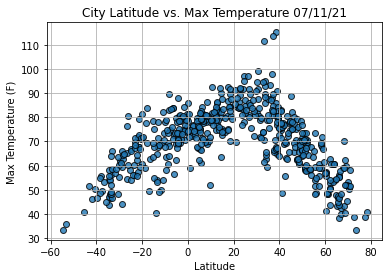

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

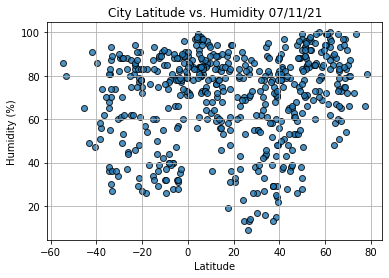

In [29]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

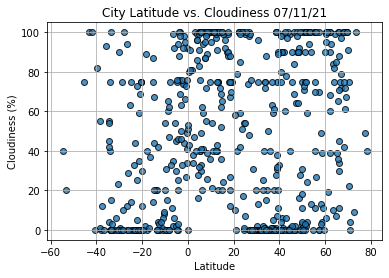

In [30]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

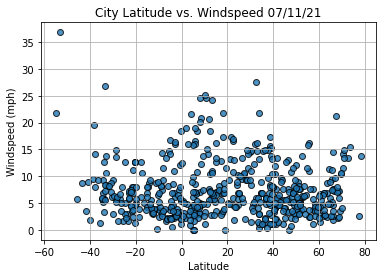

In [31]:
# Build the scatter plot for latitude vs. windspeed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Windspeed "+ time.strftime("%x"))
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [32]:
from scipy.stats import linregress

In [33]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# If we run this code there will be no output until we call the function with five parameters.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
#The output will present all the information at index 13 of the city_data_df DataFrame.
index13 = city_data_df.loc[13]
index13

City                       Hellin
Country                        ES
Date          2021-07-11 21:38:45
Lat                       38.5106
Lng                        -1.701
Max Temp                    85.78
Humidity                       43
Cloudiness                     28
Wind Speed                   4.56
Name: 13, dtype: object

In [42]:
# We can also filter a DataFrame based on a value of a row. For instance, if we wanted to get all Northern Hemisphere 
# latitudes, for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame using the code 
# city_data_df["Lat"] >= 0. Executing this code will return either "True" or "False" for all the rows that meet these 
#criteria.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mogadishu,SO,2021-07-11 21:29:38,2.0371,45.3438,76.86,84,34,18.90
2,Plyussa,RU,2021-07-11 21:38:41,58.4308,29.3654,67.53,84,4,4.92
3,Impfondo,CG,2021-07-11 21:38:42,1.6381,18.0667,72.37,87,81,2.21
4,Gorele,TR,2021-07-11 21:38:42,41.0308,39.0031,76.44,84,6,4.12
5,Almunecar,ES,2021-07-11 21:38:43,36.7339,-3.6907,97.88,58,63,4.81


In [43]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Busselton,AU,2021-07-11 21:28:54,-33.6500,115.3333,56.05,87,100,26.80
8,Coquimbo,CL,2021-07-11 21:33:16,-29.9533,-71.3436,55.13,82,90,9.22
10,Catumbela,AO,2021-07-11 21:38:44,-12.4314,13.5472,68.74,88,0,3.00
12,Penha,BR,2021-07-11 21:36:37,-26.7694,-48.6458,65.07,88,0,5.75
18,Lebu,CL,2021-07-11 21:34:26,-37.6167,-73.6500,49.35,74,12,14.09


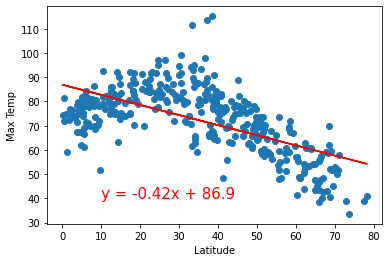

In [44]:
# To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values. 
# Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the 
# northern_hemi_df DataFrame.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

# If the equation for the regression line doesn't show up on your graph, you can change the text_coordinates until you see 
# the equation.


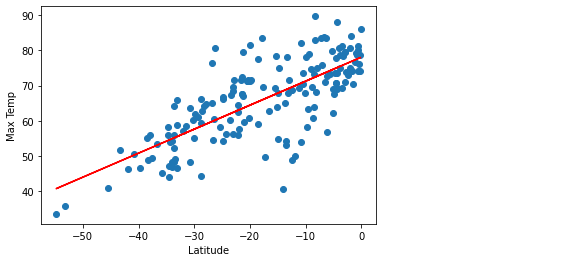

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


In [47]:
# The correlation between the latitude and the maximum temperature is strong to very strong because the 
# r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, 
# as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. 
#And when we are further from the equator the temperatures become cooler. Check the r-values for your plots.


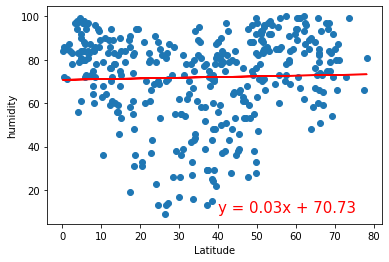

In [52]:
# Linear regression on the Northern Hemisphere - humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', 'humidity',(40,10))


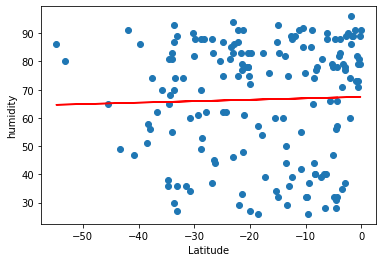

In [51]:
# Linear regression on the Southern Hemisphere - humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', 'humidity',(-50,15))

In [53]:
# The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for 
# the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable 
# due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 


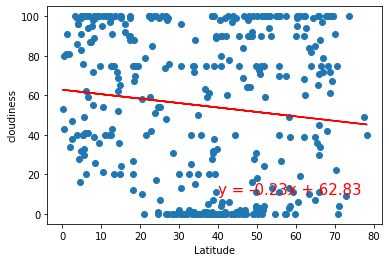

In [55]:
# Linear regression on the Northern Hemisphere - cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', 'cloudiness',(40,10))

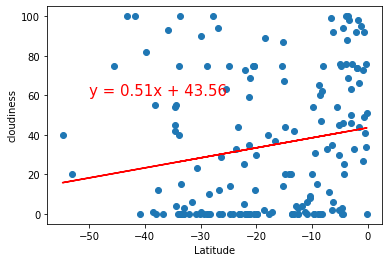

In [62]:
# Linear regression on the Southern Hemisphere - cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', 'cloudiness',(-50,60))

In [ ]:
# mine does not look like the exercise
# The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 
# for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. 
#This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent 
#cloudiness. Check the r-values for your plots.


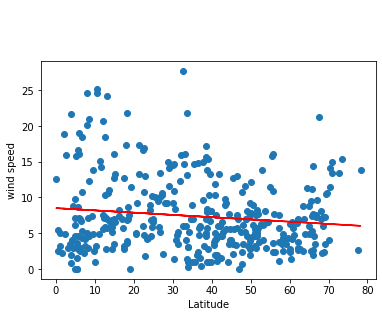

In [65]:
# Linear regression on the Northern Hemisphere - wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'wind speed',(40,35))

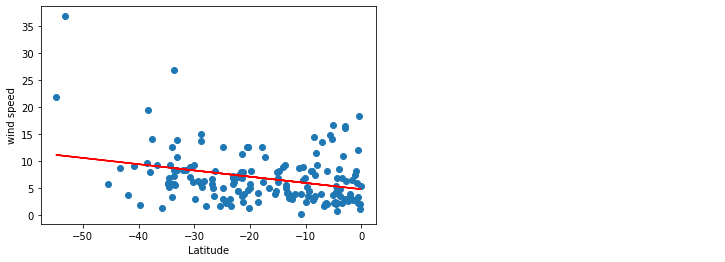

In [66]:
# Linear regression on the Southern Hemisphere - wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'wind speed',(40,35))

In [ ]:
# The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the 
# Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed 
# is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your 
# plots.
